**Train SVM Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

In [2]:
# read data from file
df = pd.read_csv('../data/raw/NBA_train.csv')

2. Prepare the dataset for model training

In [23]:
# split data into feature and target
x = df.drop(['Id', 'TARGET_5Yrs'], axis=1)# drop the ID field
# x = df[['PTS']]
y = df[['TARGET_5Yrs']]
y.head()

,TARGET_5Yrs
0,1
1,1
2,1
3,1
4,1


In [32]:
# split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# check the outcome of the splitted data
y_data.shape

(6400, 1)

In [34]:
y_data.value_counts(normalize=True)

TARGET_5Yrs
1              0.833125
0              0.166875
Name: proportion, dtype: float64

3. Set up baseline model

In [35]:
# find the most occuring value and use it as base model
y_mode = y_data.mode()
y_shape = (len(x_data), 1)
y_base = np.full(y_shape, y_mode)

In [36]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data, y_base)

0.833125

4. Train SVC model

In [45]:
from sklearn.svm import SVC
svc_1 = SVC()
svc_1.fit(x_data, y_data)
print(svc_1.score(x_data, y_data))
print(svc_1.score(x_test, y_test))

/Users/arthurso/Library/Python/3.10/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.833125
0.835625


5. Exam the model

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

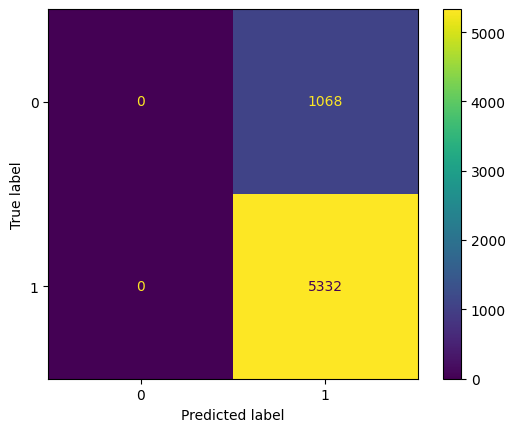

In [42]:
ConfusionMatrixDisplay.from_estimator(  svc_1, x_data, y_data)

6. Conclusion
From the EDA and the model training result, SVM may not be the ideal algorithm for this case.